In [ ]:
!pip install -q keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import keras_tuner
import matplotlib.pyplot as plt

In [ ]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [ ]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
ytrain = tf.keras.utils.to_categorical(ytrain)

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],xtest.shape[2],1)

In [ ]:
xtrain.shape,xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

In [ ]:
import keras_tuner.engine.hyperparameters as hp

In [ ]:
def get_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input((28,28,1)))

  model.add(tf.keras.layers.Conv2D(filters = hp.Int('conv1_filter',min_value = 32, max_value = 128, step = 16),
                                 kernel_size = hp.Choice('conv1_kernel',values= [3,5]),
                                 padding = 'same'))
  model.add(tf.keras.layers.MaxPool2D(pool_size = hp.Choice('pool1_size',values = [2,3]),
                                    strides = (1,1),padding = 'same'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(hp.Int('Hidden_1',min_value = 16,max_value = 64, step =16),
                                  activation = 'relu'))
  model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr',values = [1e-2,1e-3,1e-4])),
                loss = 'categorical_crossentropy',metrics = ['accuracy'])

  return model

In [ ]:
from keras_tuner import RandomSearch

In [ ]:
tuner = RandomSearch(get_model,objective='val_accuracy',max_trials = 5,directory = 'output',overwrite = True,project_name = 'Fashion_MNIST')

In [ ]:
tuner.search(xtrain,ytrain,epochs = 3, validation_split = 0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9035000205039978

Best val_accuracy So Far: 0.9035000205039978
Total elapsed time: 00h 02m 27s


In [ ]:
#del model

In [ ]:
model = tuner.get_best_models(num_models = 1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 96)        2496      
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 96)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 75264)             0         
                                                                 
 dense (Dense)               (None, 32)                2408480   
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 2411306 (9.20 MB)
Trainable params: 2411306 (9.20 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.fit(xtrain,ytrain,epochs = 10,validation_split = 0.1,initial_epoch = 3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2536 - accuracy: 0.9086 - val_loss: 0.3076 - val_accuracy: 0.8970
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2272 - accuracy: 0.9169 - val_loss: 0.3293 - val_accuracy: 0.8858
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2064 - accuracy: 0.9239 - val_loss: 0.3029 - val_accuracy: 0.9030
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1950 - accuracy: 0.9284 - val_loss: 0.2779 - val_accuracy: 0.9083
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1809 - accuracy: 0.9333 - val_loss: 0.3213 - val_accuracy: 0.9023
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1676 - accuracy: 0.9378 - val_loss: 0.3576 - val_accuracy: 0.8857
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1544 - accuracy: 0.9429 - val_loss: 0.3132 - val_accuracy

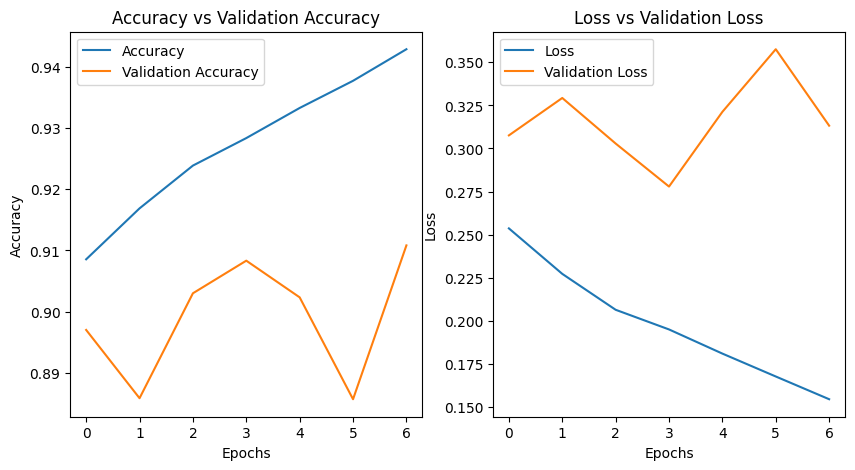

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'],label = 'Accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(model.history.history['loss'],label = 'Loss')
plt.plot(model.history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
ypred = model.predict(xtest)

313/313 [==============================] - 1s 3ms/step


In [ ]:
img_pred = []
for i in ypred:
  pred = np.argmax(i)
  img_pred.append(pred)
img_pred = np.array(img_pred)

In [ ]:
img_pred.shape,ytest.shape

((10000,), (10000,))

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

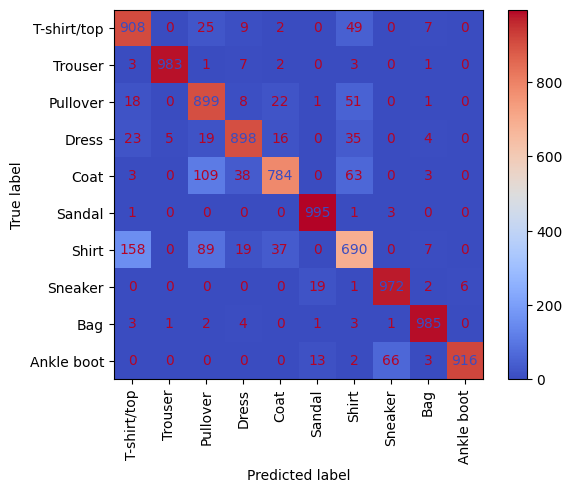

In [ ]:
cm = confusion_matrix(ytest,img_pred)
ConfusionMatrixDisplay(cm).plot(cmap = 'coolwarm')
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9],
    labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'],
           rotation = 90)
plt.yticks(ticks = [0,1,2,3,4,5,6,7,8,9],
    labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
plt.show()

In [ ]:
print(classification_report(ytest,img_pred,
                            target_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.91      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.79      0.90      0.84      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.91      0.78      0.84      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.77      0.69      0.73      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.99      0.92      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

